<a href="https://colab.research.google.com/github/lcfdiniz/puc-rio/blob/main/bank-customer-churn/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

# Predição de churn para clientes de banco

por [Lucas Fiorani Diniz](https://www.linkedin.com/in/lcfdiniz/)

## Definição do Problema

A taxa de churn (*churn rate*) é uma métrica que aponta a rotatividade dos clientes de uma empresa, ou de forma mais direta, o número de clientes que deixaram de fazer negócios com a empresa em um determinado período de tempo.

Entre as maneiras de se reduzir o churn de uma empresa, estão o entendimento dos motivos do cancelamento e identificação dos clientes com maior chance de ir embora.

Com essa abordagem, é possível realizar ações preventivas efetivas, que mantenham os clientes na base por mais tempo. O investimento na predição de churn e consequente retenção de clientes é extremamente eficiente, dado que o custo para se adquirir um novo cliente pode ser de 5 a 7 vezes maior do que manter um atual. [[1]](https://jrs.digital/conquistar-um-novo-cliente-custa-entre-5-a-7-vezes-mais-que-manter-um-atual/#:~:text=Segundo%20o%20economista%20americano%20Philip,de%20clientes%2C%20usu%C3%A1rios%20e%20compradores.)

Nesse sentido, técnicas de Machine Learning possuem um grande potencial de identificar com sucesso os fatores que levam aos cancelamentos dos serviços e os clientes com maior probabilidade de se tornarem churn.

Para o caso das instituições bancárias, altas taxas de churn podem impactar diretamente sua receita e rentabilidade. Entre os motivos para que um cliente possa decidir encerrar sua conta bancária ou deixar de utilizar os serviços de um banco, estão:

- Insatisfação com os serviços oferecidos;
- Má experiência com os produtos financeiros;
- Concorrência;
- Mudanças nas circunstâncias pessoais do cliente.

Caso essas instituições sejam capazes de identificar as causas e clientes com maior potencial de churn, é possível adotar estratégias como:

- Melhoria dos serviços;
- Personalização de ofertas e recomendações;
- Programas de fidelidade e recompensa;
- Monitoramento proativo.

### Levantamento de hipóteses

Considerando o contexto apresentado acima, é possível levantar as seguintes hipóteses a respeito da relação dos clientes de uma instituição bancária e a taxa de churn da mesma:

- Os clientes com uma maior pontuação de crédito são menos propensos a deixarem o banco;

- Os clientes com maior idade são menos propensos a deixarem o banco;

- Os clientes com contas mais antigas são mais leais e, portanto, são menos propensos a deixarem o banco;

- Os clientes que utilizam cartão de crédito são menos propensos a deixarem o banco;

- Os clientes mais ativos são menos propensos a deixarem o banco;

- Os clientes com reclamações mal-solucionadas são mais propensos a deixarem o banco.

### Restrições e condições respeitadas

Para se obter os dados do problema, a plataforma [Kaggle](https://www.kaggle.com/datasets) foi consultada. O Kaggle é a maior comunidade online de cientistas de dados e praticantes de Machine Learning, disponibilizando recursos valiosos para seus usuários, como datasets variados.

O melhor dataset encontrado para o problema foi o [*Bank Customer Churn*](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?select=Customer-Churn-Records.csv). Esse conjunto de dados possui registros do mês de abril de 2022, sendo portanto bastante recente. Cada entrada desse dataset representa um cliente, e para cada um desses estão disponíveis diversas features descrevendo variáveis demográficas, comportamentais e se o mesmo deixou a empresa no mês avaliado (variável alvo).

Sendo assim, algumas considerações devem ser feitas:

- O modelo pode sofrer um viés em relação ao mês no qual os dados foram obtidos. É possível que a taxa de churn seja distinta de acordo com o mês avaliado, bem como os motivos por trás desse indicador;

- A localização geográfica dos clientes e das instituições bancárias é um fator importante. O dataset utilizado apresenta informações demográficas de clientes em países europeus, e portanto sujeitas às particularidades dessas regiões;

- Ainda, é possível que o comportamento dos clientes (serviços utilizados, confiança em bancos e a própria educação financeira) em países europeus seja diferente daquele observado para clientes sul-americanos;

- Por fim, existem fatores não englobados pelos dados disponibilizados, e que podem influenciar na decisão de um cliente em deixar a instituição bancária. Entre esses, estão possíveis ofertas agressivas da concorrência, condição econômica global e motivações no âmbito pessoal/particular.

### Dataset utilizado

In [ ]:
# URL para o repositório do GitHub onde os dados foram disponibilizados
url = "https://raw.githubusercontent.com/lcfdiniz/puc-rio/main/bank-customer-churn/data/customer-churn-records.csv"

In [ ]:
df = pd.read_csv(url)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

O dataset utilizado é composto por 10.000 entradas de dados e 18 features, sendo 14 representadas por valores numéricos (2 por números de ponto flutuante e 12 por números inteiros) e 4 representadas por valores categóricos. Não existem valores faltantes no conjunto de dados.

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
df.describe(include="object")

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [ ]:
def get_unique_values(df, col):
  print(f"Valores únicos da feature {col}:")
  print(df[col].unique())
  print("\n")

In [ ]:
get_unique_values(df, "Geography")
get_unique_values(df, "Gender")
get_unique_values(df, "Card Type")

Valores únicos da feature Geography:
['France' 'Spain' 'Germany']


Valores únicos da feature Gender:
['Female' 'Male']


Valores únicos da feature Card Type:
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']




A descrição de cada uma das features pode ser vista abaixo:

- `RowNumber`: número da linha ou registro, não afetando a permanência ou não do cliente;

- `CustomerId`: Id do cliente, sendo esse um número aleatório que também não afeta a permanência ou não do cliente;

- `Surname`: sobrenome do cliente;

- `CreditScore`: score de crédito do cliente;

- `Geography`: localização do cliente, sendo essa uma entre França, Espanha ou Alemanha;

- `Gender`: gênero do cliente;

- `Age`: idade do cliente;

- `Tenure`: número de anos em que o cliente encontra-se vinculado ao banco;

- `Balance`: saldo da conta do cliente (em euros, provavelmente);

- `NumOfProducts`: número de produtos que o cliente aderiu através do banco;

- `HasCrCard`: se o cliente possui (1) ou não (0) cartão de crédito;

- `IsActiveMember`: se o cliente é um membro ativo (1) ou não (0). Os critérios para essa feature não foram especificados pelo fornecedor do conjunto de dados;

- `EstimatedSalary`: salário estimado do cliente (em euros, provavelmente);

- `Exited`: variável alvo, que indica se o cliente deixou o banco (1) ou não (0) no mês avaliado;

- `Complain`: se o cliente realizou reclamações (1) ou não (0);

- `Satisfaction Score`: nota de satisfação fornecida pelo cliente para a resolução de sua reclamação;

- `Card Type`: tipo de cartão que o cliente possui, podendo ser um entre Diamond, Gold, Silver e Platinum;

- `Points Earned`: pontos ganhos pelo cliente pelo uso do cartão de crédito.

O atributo `Exited` será utilizado como a variável alvo do problema de Machine Learning, sendo essa responsável por indicar se o cliente se tornou um churn (1) ou não (0) no mês avaliado. Portanto, o modelo desenvolvido deverá responder um problema de classificação binária.

## Preparação de Dados

Na etapa de preparação dos dados, os dados brutos serão transformados em um formato mais apropriado para a modelagem. Para isso, deve-se verificar a existência ou não de dados faltantes ou discrepantes (*outliers*), realizar as transformações adequadas aos dados e selecionar os atributos mais relevantes ao problema.

De antemão, sabe-se que os atributos `RowNumber`, `CustomerId` e `Surname` não carregam consigo informação discriminante para o problema, e portanto podem ser removidas do conjunto de dados utilizado.

Iniciaremos com a divisão do conjunto de dados entre treinamento e teste:

In [ ]:
test_size = 0.2 # tamanho do conjunto de teste

X = df.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = df["Exited"].to_numpy()

Um ponto importante nessa etapa é a verificação do desbalanceamento do conjunto de dados utilizado, o que é indicado pela distribuição das classes da variável alvo.

In [ ]:
def plot_proportions(df, var):
  plt.figure(figsize=(4, 3))
  ax = sns.barplot(x=df[var].value_counts().index,
                  y=df[var].value_counts(normalize=True).values)
  plt.title(f"Atributo {var}")
  for i, v in enumerate(df[var].value_counts(normalize=True).values):
      ax.text(i, v+.01, f"{v:.2f}", horizontalalignment='center')

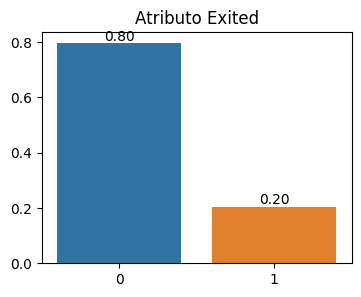

In [ ]:
plot_proportions(df, "Exited")

O quantitativo de 20% para a classe minoritária indica um desbalanceamento leve, onde técnicas de amostragem podem ou não ser aplicadas. Em um primeiro momento, será considerado que os modelos utilizados são capazes de lidar com o desequilíbrio de proporções do conjunto de dados original.

In [ ]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=True, random_state=seed,
                                                    stratify=y)

Para a divisão dos dados em treinamento e teste, foi aplicada a técnica *holdout* com estratificação baseada na variável alvo, o que garante que as proporções de registros com churn ou não sejam aproximadamente iguais nas duas bases.

Outra análise importante é entender quais variáveis númericas representam, na verdade, valores categóricos ou binários. Para isso, pode-se verificar o número de valores únicos para cada atributo:

In [ ]:
X_train.nunique()

CreditScore            457
Geography                3
Gender                   2
Age                     68
Tenure                  11
Balance               5113
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       7999
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           784
dtype: int64

Sendo assim, podemos separar os atributos da base de treinamento entre numéricos, categóricos e binários:

In [ ]:
# Atributos categóricos
cat_vars = X_train.select_dtypes(include=["object"]).columns.tolist()
print(f"Atributos categóricos: {', '.join(cat_vars)}")

# Atributos binários
bin_vars = ["HasCrCard", "IsActiveMember", "Complain"]
print(f"Atributos binários: {', '.join(bin_vars)}")

# Atributos numéricos
num_vars = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_vars = [x for x in num_vars if x not in bin_vars]
print(f"Atributos numéricos: {', '.join(num_vars)}")

Atributos categóricos: Geography, Gender, Card Type
Atributos binários: HasCrCard, IsActiveMember, Complain
Atributos numéricos: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary, Satisfaction Score, Point Earned


### Tratamento de valores faltantes e *outliers*

Outro aspecto imporante, mas que não é o foco do presente trabalho, diz respeito ao tratamento de valores faltantes e discrepantes (*outliers*). Conforme visto anteriormente, não existem valores faltantes no conjunto de dados avaliado.

Podemos verificar a presença ou não de *outliers* analisando a distribuição dos dados, plotando seus histogramas e boxplots.

O boxplot em particular utiliza o método de Tukey para a identificação de *outliers*, sendo esses exibidos por asteriscos (*). Esse método é baseado no intervalo interquartil (IQR), definido pela distância entre o primeiro quartil (onde estão localizados os 25% menores valores) e o terceiro quartil (onde estão localizados os 25% maiores valores).

Esse método considera que qualquer valor 1,5 IQR menor que o primeiro quartil ou 1,5 IQR maior que o terceiro quartil é um valor discrepante. Podemos analisar isso nos gráficos abaixo:

In [ ]:
def plot_distributions(df, vars):
  if isinstance(vars, str):
    vars = [vars]
  for var in vars:
    fig, axes = plt.subplots(2, 1, figsize=(6, 4), gridspec_kw={'height_ratios': [4, 1]})
    sns.histplot(data=df, x=var, kde=True, ax=axes[0])
    sns.boxplot(data=df, x=var, ax=axes[1])
    plt.suptitle(f"Atributo {var}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

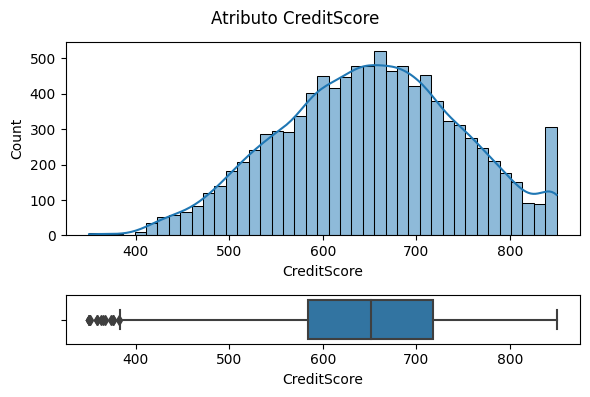

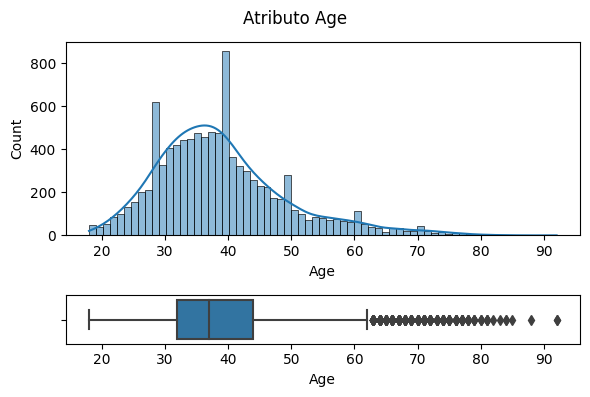

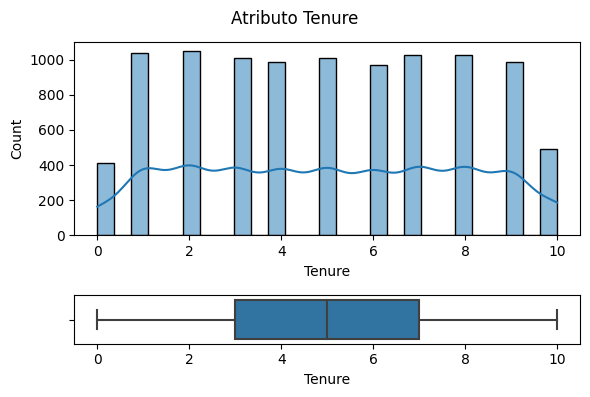

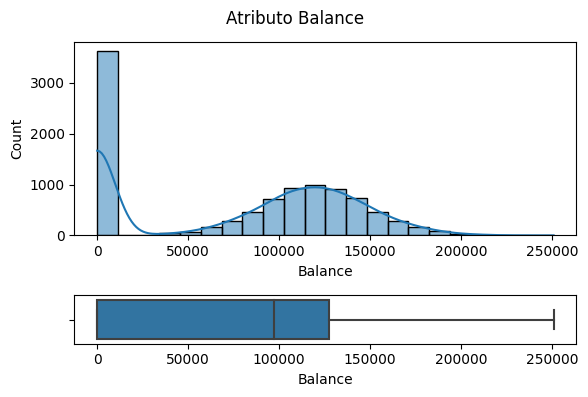

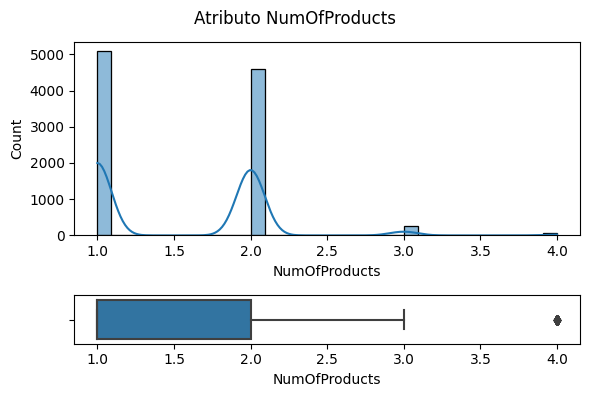

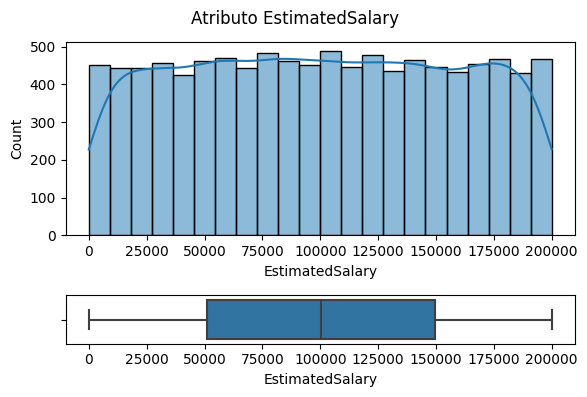

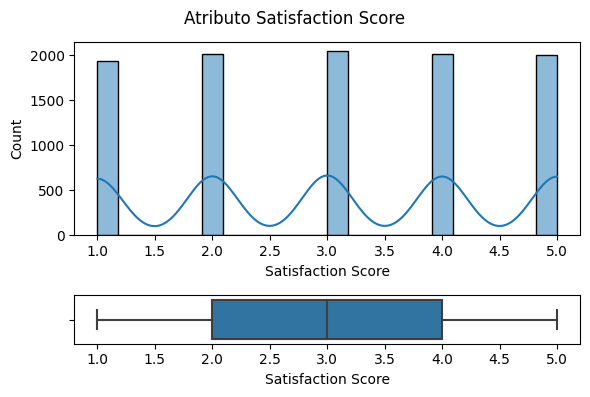

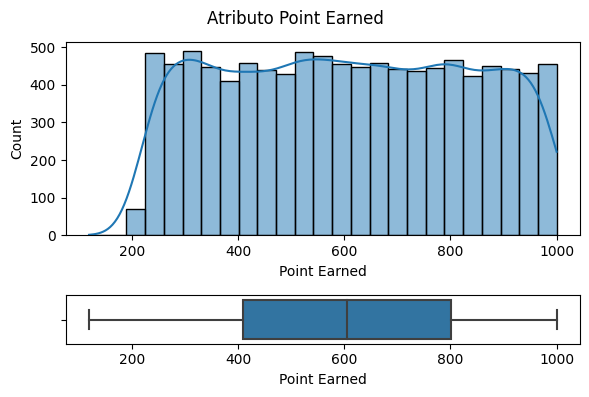

In [ ]:
plot_distributions(df, num_vars)

Apesar da presença de valores discrepantes, segundo o método de Tukey, para os atributos `NumOfProducts`, `Age` e `CreditScore`, é possível observar que esses valores são factíveis, e portanto devem pertencer à distribuição natural dos dados.

### Feature Selection

Agora, é necessário verificar se mais algum atributo se mostra pouco relevante para o problema, dado que esses podem afetar negativamente o resultado do modelo.

#### SelectKBest

Uma das formas de se realizar Feature Selection é através de seleção univariada, onde testes estatísticos são aplicados para selecionar os atributos que tenham relação mais forte com a variável de saída.

A biblioteca scikit-learn disponibiliza a classe **SelectKBest**, que seleciona os K atributos com maior pontuação no teste realizado. Para esse problema, será utilizado o teste ANOVA para escolher os 5 atributos **numéricos** mais importantes para o problema. É importante ressaltar que o teste ANOVA só deverá ser aplicado a atributos preditores numéricos em conjunto com uma variável alvo categórica, como é o caso.

In [ ]:
# Seleciona os 5 melhores atributos numéricos
kbest = SelectKBest(score_func=f_classif, k=5)
kbest.fit(X_train[num_vars], y_train)
kbest_vars = list(kbest.get_feature_names_out())

print(f"Atributos selecionados pela classe SelectKBest: {', '.join(kbest_vars)}")

Atributos selecionados pela classe SelectKBest: CreditScore, Age, Balance, NumOfProducts, EstimatedSalary


#### Feature Importance

Outra forma de selecionar os atributos mais relevantes para o problema consiste em utilizar um algoritmo de Machine Learning capaz de estimar a importância dos atributos, como é o caso da RandomForest e ExtraTrees.

A implementação do ExtraTrees do scikit-learn serã utilizada para se obter os atributos mais relevantes para o problema. Uma etapa prévia necessária para a execução do ExtraTrees é a transformação dos dados categóricos, para os quais será aplicado o **OneHotEncoder** do scikit-learn.

Essa transformação cria uma coluna para cada categoria do atributo, assinalando com 1 caso o registro pertença à classe em questão ou 0 caso contrário.

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore').fit(X_train[cat_vars])
ohe_df = pd.DataFrame(ohe.transform(X_train[cat_vars]).toarray(),
                      columns=ohe.get_feature_names_out(),
                      index=X_train.index)
# Cria uma nova visualização dos dados com OneHotEncoder para dados categóricos
X_train_ohe = pd.concat([X_train, ohe_df], axis=1).drop(cat_vars, axis=1)

X_train_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
4791,709,35,2,0.00,2,1,0,104982.39,0,2,422,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8881,744,29,1,43504.42,1,1,1,119327.75,0,1,607,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6166,773,64,2,145578.28,1,0,1,186172.85,0,1,630,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4473,646,29,4,105957.44,1,1,0,15470.91,0,1,345,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
854,675,57,8,0.00,2,0,1,95463.29,0,3,632,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def plot_feature_importances(model):
  plt.figure(figsize=(8,6))
  ax = sns.barplot(x=model.feature_names_in_,
              y=model.feature_importances_)
  plt.title(f"Importância dos atributos")
  plt.xticks(rotation=90)
  for i, v in enumerate(model.feature_importances_):
      ax.text(i, v+.01, f"{v:.2f}", horizontalalignment='center')

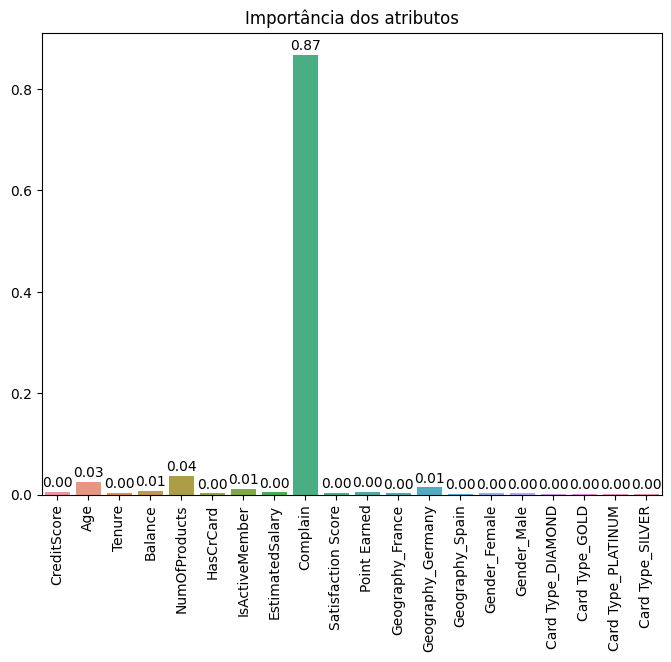

In [ ]:
# Cria uma instância do classificador ExtraTrees
etc = ExtraTreesClassifier(n_estimators=50)
etc.fit(X_train_ohe, y_train)
# Plota a importância dos atributos para o modelo
plot_feature_importances(etc)

In [ ]:
# Seleciona os 10 atributos mais importantes
fi_vars = [var for _, var in sorted(zip(etc.feature_importances_, etc.feature_names_in_), reverse=True)][:10]

print(f"Atributos selecionados por importância no modelo ExtraTrees: {', '.join(fi_vars)}")

Atributos selecionados por importância no modelo ExtraTrees: Complain, NumOfProducts, Age, Geography_Germany, IsActiveMember, Balance, Point Earned, CreditScore, EstimatedSalary, Tenure


### Pipelines e validação cruzada

Ainda nessa etapa, é fundamental se atentar ao problema conhecido como *data leakage* ou vazamento de dados. Isso ocorre quando as informações da base de teste são indevidamente absorvidas durante a fase de treino, resultando em uma estimativa enviesada e incorreta do desempenho de um modelo.

Os **Pipelines** da biblioteca scikit-learn serão utilizados para nos auxiliar nesse problema. Estes deverão executar as seguintes etapas, para cada *fold* utilizado para treinamento no processo de validação cruzada:

- Aplicar as transformações aos dados de entrada: Normalização ou Padronização aos dados numéricos e OneHotEncoder aos dados categóricos;

- Realizar a seleção de atributos: SelectKBest ou Feature Importance do modelo ExtraTrees;

- Treinar modelos com base nos algoritmos de Machine Learning mais adequados ao problema (classificação binária).

Por meio da validação cruzada, será verificado qual modelo performa melhor (combinação entre as técnicas de transformação de dados, seleção de atributos e algoritmos de Machine Learning) nos dados de treino. A técnica de validação cruzada também nos ajudará a decidir, na sequência, quais os melhores parâmetros para o modelo escolhido.

O modelo resultante dessa etapa será utilizado na predição dos dados do conjunto de teste, garantindo resultados confiáveis sobre o desempenho do mesmo em um ambiente mais próximo do real (em produção).



In [ ]:
n_folds = 10 # Número de partições do método k-Fold

# Definindo a validação cruzada com estratificação
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

In [ ]:
# Definindo os pipelines para as transformações
cat_pipe = Pipeline([
    ('ohe', OneHotEncoder())
])

num_std_pipe = Pipeline([
    ('std', StandardScaler())
])

num_mms_pipe = Pipeline([
    ('mms', MinMaxScaler())
])

transform_ori_pipe = ColumnTransformer([
    ('cat', cat_pipe, cat_vars),
    ('num', 'passthrough', num_vars),
    ('bin', 'passthrough', bin_vars)
])
transform_ori = ('transform', transform_ori_pipe)

transform_std_pipe = ColumnTransformer([
    ('cat', cat_pipe, cat_vars),
    ('num', num_std_pipe, num_vars),
    ('bin', 'passthrough', bin_vars)
])
transform_std = ('transform', transform_std_pipe)

transform_mms_pipe = ColumnTransformer([
    ('cat', cat_pipe, cat_vars),
    ('num', num_mms_pipe, num_vars),
    ('bin', 'passthrough', bin_vars)
])
transform_mms = ('transform', transform_mms_pipe)

In [ ]:
# Funções auxiliares
def get_cat_indices(X):
  return np.arange(0, X.shape[1]-(len(num_vars)+len(bin_vars)))

def get_num_indices(X):
  return np.arange(X.shape[1]-(len(num_vars)+len(bin_vars)), X.shape[1]-len(bin_vars))

def get_bin_indices(X):
  return np.arange(X.shape[1]-len(bin_vars), X.shape[1])

In [ ]:
# Definindo os pipelines para a seleção de atributos
kbest_pipe = ColumnTransformer([
    ('cat', 'passthrough', get_cat_indices),
    ('num', SelectKBest(score_func=f_classif, k=5), get_num_indices),
    ('bin', 'passthrough', get_bin_indices)
])
kbest = ('select', kbest_pipe)

fi_pipe = Pipeline([
    ('fi', SelectFromModel(ExtraTreesClassifier(n_estimators=50),
                           threshold=-np.inf,
                           max_features=10))
])
fi = ('select', fi_pipe)

## Modelagem e Treinamento

Diversos modelos de classificação são aplicáveis ao problema, desde os mais simples, como a Árvore de Decisão, até os mais complexos, como ensembles tais quais as Random Forests. Os seguintes modelos serão avaliados:

- Regressão Logística;
- Árvore de Decisão;
- SVM;
- kNN;
- Naive Bayes;
- Random Forest;
- AdaBoost;
- Gradient Boosting.

In [ ]:
# Definindo os modelos aplicáveis ao problema
models = {"lr": ('lr', LogisticRegression(max_iter=500)),
          "dtc": ('dtc', DecisionTreeClassifier()),
          "svm": ('svm', SVC()),
          "knn": ('knn', KNeighborsClassifier()),
          "nb": ('nb', GaussianNB()),
          "rf": ('rf', RandomForestClassifier()),
          "ada": ('ada', AdaBoostClassifier()),
          "gb": ('gb', GradientBoostingClassifier())}

### Métricas de avaliação

Uma etapa importante nesse estágio é definir as métricas de avaliação mais condizentes com o problema. O fato das classes do problema serem levemente desbalanceadas é extremamente relevante nessa escolha.

Se utilizada a **acurácia**, por exemplo, que consiste no número de acertos sobre o número total de predições, podemos ter uma estimativa irreal do desempenho do modelo. Isso ocorre pois, para os casos em que a classe majoritária é muito predominante, a simples escolha por essa classe em cada predição realizada já resultaria em um alto valor de acurácia.

A **precisão**, por sua vez, indica o número de predições positivas que de fato estão corretas. Nesse sentido, poderiamos ter um modelo com boa precisão, mas que identifica uma porcentagem muito baixa de churn.

O **recall** seria uma métrica mais interessante para esse problema. Também chamado de sensibilidade ou taxa de verdadeiros positivos, essa indica a porcentagem de amostras da classe verdadeira que foram corretamente identificadas pelo modelo.

Existe um *trade-off* a ser realizado entre precisão e recall. No contexto do problema de negócios apresentado, um modelo com maior precisão e menor recall seria bastante correto nos casos de churn identificados, porém detectaria uma pequena parcela desses. Os custos envolvidos, nesse contexto, seriam em relação à "perda" do LTV (*Lifetime Value*) do cliente não identificado como churn e que posteriormente deixa a empresa.

Em um segundo caso, quando o modelo apresenta um maior recall e menor precisão, grande parte das ocorrências de churn seriam identificadas, porém o modelo produziria mais falsos positivos, ou seja, clientes que não se tornariam churn. O custo envolvido, para esse caso, seria em relação aos gastos desnecessários em ações de campanhas para retenção de clientes que, na verdade, não deixariam a empresa na ausência das mesmas.

A proporção entre o custo de se reter um cliente ou perdê-lo como churn pode variar muito e depende do tipo de negócio, o valor daquele cliente em específico e outros fatores. Uma informação apontada anteriormente, no entanto, mostra que o custo para se adquirir um novo cliente é de 5 a 7 vezes maior do que o custo para se manter um atual.

Sendo assim, a métrica de avaliação mais importante nesse contexto será a **F$\beta$-Score**, que realiza um média harmônica ponderada entre precisão e recall. A ponderação é realizada por meio de um parâmetro $\beta$, que define o peso do recall em relação à precisão. Diante do que foi apresentado, $\beta$ será definido como 5 (recall com peso 5x maior que a precisão).

In [ ]:
# Definindo a função de pontuação customizada
fbeta_scorer = make_scorer(fbeta_score, beta=5)

### Treinamento dos modelos

In [ ]:
# Listas para armazenar os pipelines e resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os pipelines

# Dataset original, sem seleção de atributos
pipelines.append(('lr-ori', Pipeline([transform_ori, models["lr"]])))
pipelines.append(('dtc-ori', Pipeline([transform_ori, models["dtc"]])))
pipelines.append(('svm-ori', Pipeline([transform_ori, models["svm"]])))
pipelines.append(('knn-ori', Pipeline([transform_ori, models["knn"]])))
pipelines.append(('nb-ori', Pipeline([transform_ori, models["nb"]])))
pipelines.append(('rf-ori', Pipeline([transform_ori, models["rf"]])))
pipelines.append(('ada-ori', Pipeline([transform_ori, models["ada"]])))
pipelines.append(('gb-ori', Pipeline([transform_ori, models["gb"]])))

# Dataset padronizado, sem seleção de atributos
pipelines.append(('lr-std', Pipeline([transform_std, models["lr"]])))
pipelines.append(('dtc-std', Pipeline([transform_std, models["dtc"]])))
pipelines.append(('svm-std', Pipeline([transform_std, models["svm"]])))
pipelines.append(('knn-std', Pipeline([transform_std, models["knn"]])))
pipelines.append(('nb-std', Pipeline([transform_std, models["nb"]])))
pipelines.append(('rf-std', Pipeline([transform_std, models["rf"]])))
pipelines.append(('ada-std', Pipeline([transform_std, models["ada"]])))
pipelines.append(('gb-std', Pipeline([transform_std, models["gb"]])))

# Dataset normalizado, sem seleção de atributos
pipelines.append(('lr-mms', Pipeline([transform_mms, models["lr"]])))
pipelines.append(('dtc-mms', Pipeline([transform_mms, models["dtc"]])))
pipelines.append(('svm-mms', Pipeline([transform_mms, models["svm"]])))
pipelines.append(('knn-mms', Pipeline([transform_mms, models["knn"]])))
pipelines.append(('nb-mms', Pipeline([transform_mms, models["nb"]])))
pipelines.append(('rf-mms', Pipeline([transform_mms, models["rf"]])))
pipelines.append(('ada-mms', Pipeline([transform_mms, models["ada"]])))
pipelines.append(('gb-mms', Pipeline([transform_mms, models["gb"]])))

# Dataset original, com seleção por SelectKBest
pipelines.append(('lr-ori-kbest', Pipeline([transform_ori, kbest, models["lr"]])))
pipelines.append(('dtc-ori-kbest', Pipeline([transform_ori, kbest, models["dtc"]])))
pipelines.append(('svm-ori-kbest', Pipeline([transform_ori, kbest, models["svm"]])))
pipelines.append(('knn-ori-kbest', Pipeline([transform_ori, kbest, models["knn"]])))
pipelines.append(('nb-ori-kbest', Pipeline([transform_ori, kbest, models["nb"]])))
pipelines.append(('rf-ori-kbest', Pipeline([transform_ori, kbest, models["rf"]])))
pipelines.append(('ada-ori-kbest', Pipeline([transform_ori, kbest, models["ada"]])))
pipelines.append(('gb-ori-kbest', Pipeline([transform_ori, kbest, models["gb"]])))

# Dataset padronizado, com seleção por SelectKBest
pipelines.append(('lr-std-kbest', Pipeline([transform_std, kbest, models["lr"]])))
pipelines.append(('dtc-std-kbest', Pipeline([transform_std, kbest, models["dtc"]])))
pipelines.append(('svm-std-kbest', Pipeline([transform_std, kbest, models["svm"]])))
pipelines.append(('knn-std-kbest', Pipeline([transform_std, kbest, models["knn"]])))
pipelines.append(('nb-std-kbest', Pipeline([transform_std, kbest, models["nb"]])))
pipelines.append(('rf-std-kbest', Pipeline([transform_std, kbest, models["rf"]])))
pipelines.append(('ada-std-kbest', Pipeline([transform_std, kbest, models["ada"]])))
pipelines.append(('gb-std-kbest', Pipeline([transform_std, kbest, models["gb"]])))

# Dataset normalizado, com seleção por SelectKBest
pipelines.append(('lr-mms-kbest', Pipeline([transform_mms, kbest, models["lr"]])))
pipelines.append(('dtc-mms-kbest', Pipeline([transform_mms, kbest, models["dtc"]])))
pipelines.append(('svm-mms-kbest', Pipeline([transform_mms, kbest, models["svm"]])))
pipelines.append(('knn-mms-kbest', Pipeline([transform_mms, kbest, models["knn"]])))
pipelines.append(('nb-mms-kbest', Pipeline([transform_mms, kbest, models["nb"]])))
pipelines.append(('rf-mms-kbest', Pipeline([transform_mms, kbest, models["rf"]])))
pipelines.append(('ada-mms-kbest', Pipeline([transform_mms, kbest, models["ada"]])))
pipelines.append(('gb-mms-kbest', Pipeline([transform_mms, kbest, models["gb"]])))

# Dataset original, com seleção por Feature Importance
pipelines.append(('lr-ori-fi', Pipeline([transform_ori, fi, models["lr"]])))
pipelines.append(('dtc-ori-fi', Pipeline([transform_ori, fi, models["dtc"]])))
pipelines.append(('svm-ori-fi', Pipeline([transform_ori, fi, models["svm"]])))
pipelines.append(('knn-ori-fi', Pipeline([transform_ori, fi, models["knn"]])))
pipelines.append(('nb-ori-fi', Pipeline([transform_ori, fi, models["nb"]])))
pipelines.append(('rf-ori-fi', Pipeline([transform_ori, fi, models["rf"]])))
pipelines.append(('ada-ori-fi', Pipeline([transform_ori, fi, models["ada"]])))
pipelines.append(('gb-ori-fi', Pipeline([transform_ori, fi, models["gb"]])))

# Dataset padronizado, com seleção por Feature Importance
pipelines.append(('lr-std-fi', Pipeline([transform_std, fi, models["lr"]])))
pipelines.append(('dtc-std-fi', Pipeline([transform_std, fi, models["dtc"]])))
pipelines.append(('svm-std-fi', Pipeline([transform_std, fi, models["svm"]])))
pipelines.append(('knn-std-fi', Pipeline([transform_std, fi, models["knn"]])))
pipelines.append(('nb-std-fi', Pipeline([transform_std, fi, models["nb"]])))
pipelines.append(('rf-std-fi', Pipeline([transform_std, fi, models["rf"]])))
pipelines.append(('ada-std-fi', Pipeline([transform_std, fi, models["ada"]])))
pipelines.append(('gb-std-fi', Pipeline([transform_std, fi, models["gb"]])))

# Dataset normalizado, com seleção por Feature Importance
pipelines.append(('lr-mms-fi', Pipeline([transform_mms, fi, models["lr"]])))
pipelines.append(('dtc-mms-fi', Pipeline([transform_mms, fi, models["dtc"]])))
pipelines.append(('svm-mms-fi', Pipeline([transform_mms, fi, models["svm"]])))
pipelines.append(('knn-mms-fi', Pipeline([transform_mms, fi, models["knn"]])))
pipelines.append(('nb-mms-fi', Pipeline([transform_mms, fi, models["nb"]])))
pipelines.append(('rf-mms-fi', Pipeline([transform_mms, fi, models["rf"]])))
pipelines.append(('ada-mms-fi', Pipeline([transform_mms, fi, models["ada"]])))
pipelines.append(('gb-mms-fi', Pipeline([transform_mms, fi, models["gb"]])))

In [ ]:
# Executando os pipelines
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=fbeta_scorer)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

lr-ori: 0.064 (0.013)
dtc-ori: 0.991 (0.007)
svm-ori: 0.000 (0.000)
knn-ori: 0.087 (0.011)
nb-ori: 0.104 (0.015)
rf-ori: 0.999 (0.002)
ada-ori: 0.999 (0.002)
gb-ori: 0.999 (0.002)
lr-std: 0.999 (0.002)
dtc-std: 0.993 (0.005)
svm-std: 0.999 (0.002)
knn-std: 0.628 (0.028)
nb-std: 0.999 (0.002)
rf-std: 0.999 (0.002)
ada-std: 0.999 (0.002)
gb-std: 0.999 (0.002)
lr-mms: 0.999 (0.002)
dtc-mms: 0.992 (0.007)
svm-mms: 0.999 (0.002)
knn-mms: 0.985 (0.008)
nb-mms: 0.999 (0.002)
rf-mms: 0.999 (0.002)
ada-mms: 0.999 (0.002)
gb-mms: 0.999 (0.002)
lr-ori-kbest: 0.146 (0.276)
dtc-ori-kbest: 0.989 (0.007)
svm-ori-kbest: 0.000 (0.000)
knn-ori-kbest: 0.081 (0.013)
nb-ori-kbest: 0.105 (0.014)
rf-ori-kbest: 0.999 (0.002)
ada-ori-kbest: 0.999 (0.002)
gb-ori-kbest: 0.999 (0.002)
lr-std-kbest: 0.999 (0.002)
dtc-std-kbest: 0.990 (0.008)
svm-std-kbest: 0.999 (0.002)
knn-std-kbest: 0.739 (0.027)
nb-std-kbest: 0.999 (0.002)
rf-std-kbest: 0.999 (0.002)
ada-std-kbest: 0.999 (0.002)
gb-std-kbest: 0.999 (0.002)
lr-m

#### Comparação por transformações

In [ ]:
# Filtrando os resultados com o dataset original
mask = [name for name in names if "ori" in name]
idx = [names.index(name) for name in mask]
ori_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com o dataset padronizado
mask = [name for name in names if "std" in name]
idx = [names.index(name) for name in mask]
std_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com o dataset normalizado
mask = [name for name in names if "mms" in name]
idx = [names.index(name) for name in mask]
mms_results = np.concatenate([results[i] for i in idx])

In [ ]:
def plot_comparison(labels, values, category):
  # Obtendo as médias e medianas de cada categoria
  means = [np.mean(value) for value in values]
  medians = [np.median(value) for value in values]
  # Criando a figura
  fig = plt.figure(figsize=(3*len(labels),6))
  fig.suptitle(f"Comparação de {category}")
  ax = fig.add_subplot(111)
  plt.boxplot(values, showmeans=True, meanline=True,
                  medianprops=dict(linestyle='-', linewidth=1.5, color='green'),
                  meanprops=dict(linestyle='-', linewidth=1.5, color='purple'))
  ax.set_xticklabels(labels)
  # Plotando as médias e medianas
  for i, (mean, median) in enumerate(zip(means, medians)):
    y_offset = 0
    if abs(mean - median) < .05:
        y_offset = .05
    plt.text(i + 1, median, f'Mediana: {median:.2f}', ha='center', va='bottom', color='green')
    plt.text(i + 1, mean - y_offset, f'Média: {mean:.2f}', ha='center', va='bottom', color='purple')

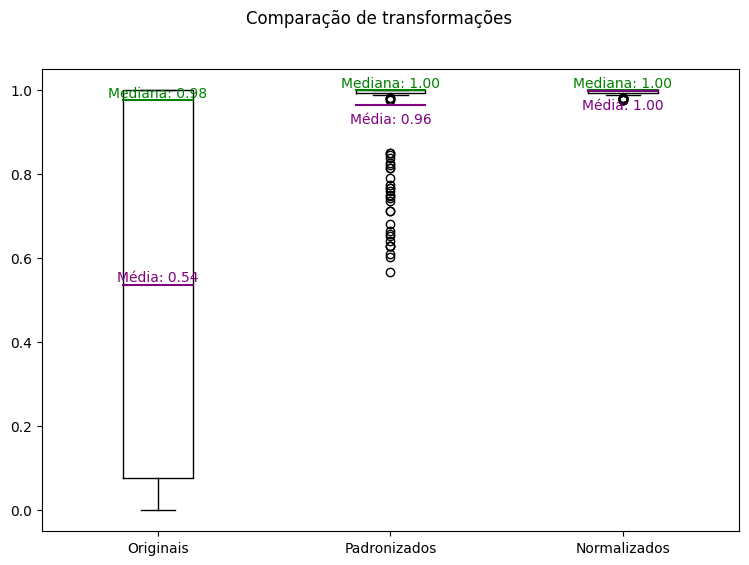

In [ ]:
labels = ["Originais", "Padronizados", "Normalizados"]
values = [ori_results, std_results, mms_results]
plot_comparison(labels, values, "transformações")

O desempenho dos modelos que utilizaram dados normalizados parece ter sido superior aos demais.

#### Comparação por técnicas de seleção

In [ ]:
# Filtrando os resultados sem seleção de atributos
mask = [name for name in names if "kbest" not in name and "fi" not in name]
idx = [names.index(name) for name in mask]
no_selection_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com SelectKBest
mask = [name for name in names if "kbest" in name]
idx = [names.index(name) for name in mask]
kbest_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com Feature Importance
mask = [name for name in names if "fi" in name]
idx = [names.index(name) for name in mask]
fi_results = np.concatenate([results[i] for i in idx])

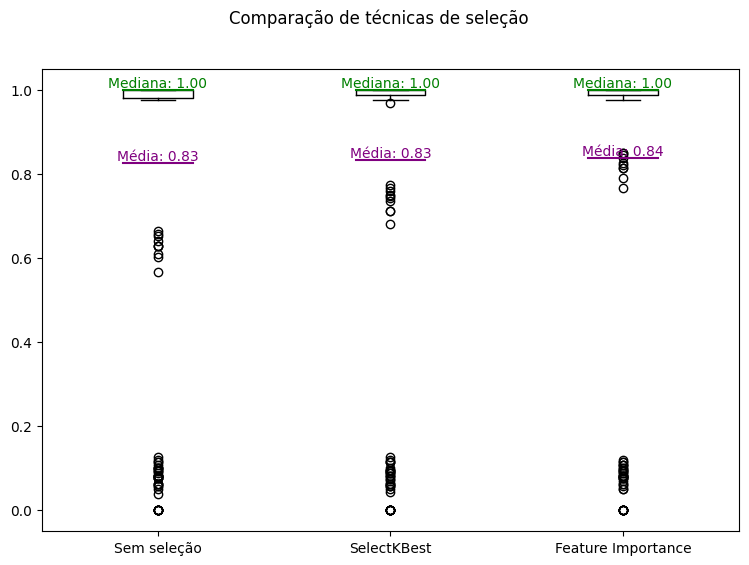

In [ ]:
labels = ["Sem seleção", "SelectKBest", "Feature Importance"]
values = [no_selection_results, kbest_results, fi_results]
plot_comparison(labels, values, "técnicas de seleção")

As técnicas de seleção de atributos apresentaram resultados discretos, de forma geral, na performance dos modelos. No entanto, os modelos com seleção por Feature Importance parecem ter desempenhado melhor que os demais.

#### Comparação por algoritmos

In [ ]:
# Filtrando os resultados com Regressão Logística
mask = [name for name in names if "lr" in name]
idx = [names.index(name) for name in mask]
lr_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com Árvores de Decisão
mask = [name for name in names if "dtc" in name]
idx = [names.index(name) for name in mask]
dtc_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com SVM
mask = [name for name in names if "svm" in name]
idx = [names.index(name) for name in mask]
svm_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com kNN
mask = [name for name in names if "knn" in name]
idx = [names.index(name) for name in mask]
knn_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com Naive Bayes
mask = [name for name in names if "nb" in name]
idx = [names.index(name) for name in mask]
nb_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com Random Forests
mask = [name for name in names if "rf" in name]
idx = [names.index(name) for name in mask]
rf_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com AdaBoost
mask = [name for name in names if "ada" in name]
idx = [names.index(name) for name in mask]
ada_results = np.concatenate([results[i] for i in idx])

# Filtrando os resultados com Gradient Boosting
mask = [name for name in names if "gb" in name]
idx = [names.index(name) for name in mask]
gb_results = np.concatenate([results[i] for i in idx])

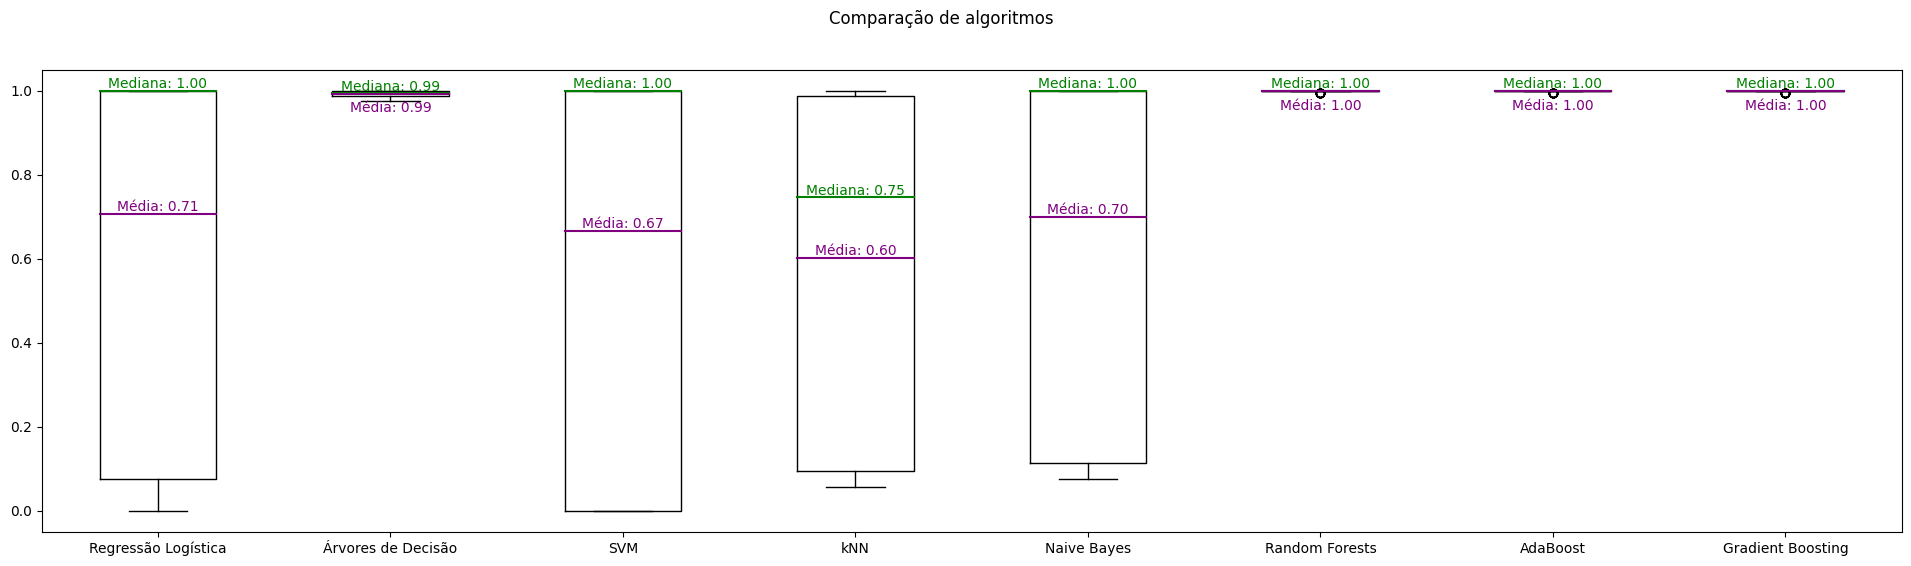

In [ ]:
labels = ["Regressão Logística", "Árvores de Decisão", "SVM", "kNN",
          "Naive Bayes", "Random Forests", "AdaBoost", "Gradient Boosting"]
values = [lr_results, dtc_results, svm_results, knn_results,
          nb_results, rf_results, ada_results, gb_results]
plot_comparison(labels, values, "algoritmos")

Pelos resultados apresentados, fica claro que os modelos baseados em árvores, seja a própria Árvore de Decisão ou ensembles derivados dessa, obtiveram os melhores resultados.

### Otimização de hiperparâmetros

De acordo com as análises dos resultados realizada acima, o modelo Random Forest com os dados normalizados e seleção de atributos por Feature Importance será escolhido para a etapa de otimização de hiperparâmetros. Diversos outros modelos, com desempenho compatível, também poderiam ter sido escolhidos.

Existem diversos hiperparâmetros que podem ser ajustados em um modelo do tipo Random Forest. Serão selecionados quatro dentre os mais importantes, garantindo que o processo de busca em gride seja executado em tempo computacional hábil. São esses:

- `n_estimators`: o número de estimadores (árvores de decisão) utilizadas na floresta. Em geral, o desempenho do modelo tende a melhorar quanto maior o número de árvores. No entanto, isso também torna o treinamento mais lento;

- `criterion`: a função utilizada para medir a qualidade das divisões. Podem ser utilizadas a impureza de Gini, a entropia ou a função Log Loss;

- `max_depth`: a profundidade máxima da árvore. Árvores mais profundas são mais propensas ao *overfitting*, enquanto árvores mais rasas podem sofrer de *underfitting*;

- `max_features`: o número máximo de atributos considerados ao se realizar a divisão dos dados. Também utilizado para controlar o *overfitting*. Um menor valor desse hiperparâmetro gera árvores mais variadas e com isso diminui a variância do modelo.

In [ ]:
# Tuning do Random Forest

pipelines = []

pipelines.append(('rf-mms-fi', Pipeline([transform_mms, fi, models["rf"]])))

param_grid = {
    'rf__n_estimators': [50, 100, 200, 500],
    'rf__criterion': ["gini", "entropy", "log_loss"],
    'rf__max_depth': [None, 5, 10, 15],
    'rf__max_features': ["sqrt", .3, .6, .9]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
  grid = GridSearchCV(estimator=model, param_grid=param_grid,
                      scoring=fbeta_scorer, cv=kfold)
  grid.fit(X_train, y_train)
  print(f"Melhor resultado: {grid.best_score_}\nUsando: {grid.best_params_}")

Melhor resultado: 0.9986077614443134
Usando: {'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__n_estimators': 50}


Encontrados os melhores hiperparâmetros para o modelo Random Forest dentro do gride avaliado, podemos prosseguir para o treinamento do modelo usando todo o conjunto de treino, avaliando os resultados no conjunto de teste.

In [ ]:
# Aplicando o OneHotEncoder aos dados categóricos
ohe = OneHotEncoder(handle_unknown='ignore').fit(X_train[cat_vars])
ohe_df = pd.DataFrame(ohe.transform(X_train[cat_vars]).toarray(),
                      columns=ohe.get_feature_names_out(),
                      index=X_train.index)
X_train_preprocess = pd.concat([X_train, ohe_df], axis=1).drop(cat_vars, axis=1)

# Aplicando MinMaxScaler aos dados numéricos
mm_scaler = MinMaxScaler().fit(X_train[num_vars]) # Ajuste do Scaler no conjunto de treino
X_train_preprocess[num_vars] = mm_scaler.transform(X_train[num_vars])

# Treinando com toda a base de treino
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train_preprocess, y_train)

# Estimativa do f-beta no conjunto de treino
predictions = model.predict(X_train_preprocess)
print(fbeta_score(y_train, predictions, beta=5))

1.0


O modelo teve um desempenho perfeito no conjunto de treino, o que pode na realidade indicar um *overfitting*. Isso será melhor verificado com a avaliação no conjunto de teste.

## Avaliação de Resultados

Nessa etapa, o modelo treinado no conjunto de treino será avaliado no conjunto de teste pré-processado, levando em conta os parâmetros obtidos no conjunto de treino.

In [ ]:
# Aplicando o OneHotEncoder aos dados categóricos
ohe_df = pd.DataFrame(ohe.transform(X_test[cat_vars]).toarray(),
                      columns=ohe.get_feature_names_out(),
                      index=X_test.index)
X_test_preprocess = pd.concat([X_test, ohe_df], axis=1).drop(cat_vars, axis=1)

# Aplicando MinMaxScaler aos dados numéricos
X_test_preprocess[num_vars] = mm_scaler.transform(X_test[num_vars])

# Estimativa do f-beta no conjunto de teste
predictions = model.predict(X_test_preprocess)
print(fbeta_score(y_test, predictions, beta=5))

0.9951918544357501


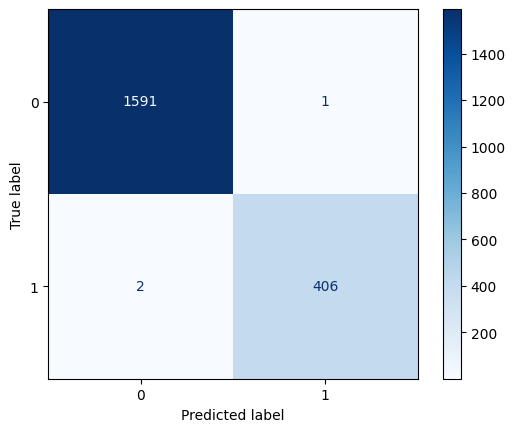

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test_preprocess, y_test, cmap="Blues")
plt.show()

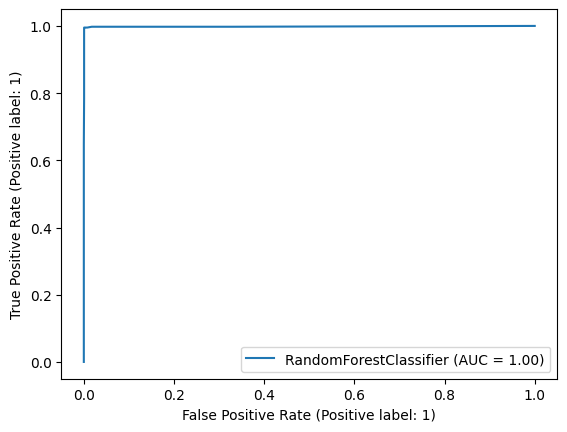

In [ ]:
RocCurveDisplay.from_estimator(model, X_test_preprocess, y_test)
plt.show()

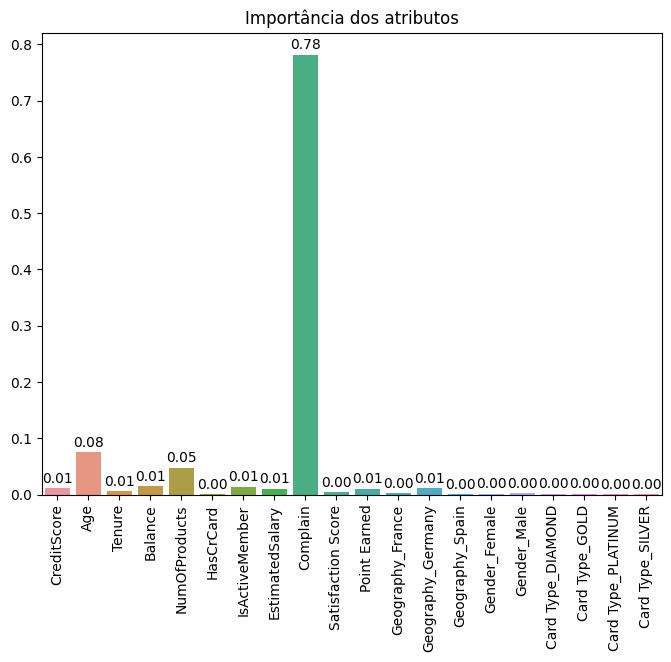

In [ ]:
plot_feature_importances(model)

Como podemos ver a partir dos resultados apresentados, o F-$\beta$ Score no conjunto de teste foi bem próximo daquele obtido no conjunto de treino, indicando que não deve ter ocorrido *overfitting*.

Além disso, foram observados valores bastante altos para essa métrica nas duas situações, indicando que não houve *underfitting*. Boa parte dos casos de *churn* estavam bem relacionados com alguns dos atributos do problema, em especial com `Complain`.

Dos 408 casos reais de churn no conjunto de teste, 406 foram corretamente identificados pelo modelo. O modelo gerou apenas 1 falso positivo, certificando seu ótimo desempenho.

Caso o modelo seja utilizado em produção, e considerando que os novos dados respeitem as distribuições observadas nesse conjunto de dados, é esperado que o mesmo seja de grande valor para uma instituição bancária, permitindo a identificação de clientes com risco de se tornarem churn.

O modelo permitirá a essas empresas otimizar os custos com campanhas de retenção e fidelização de clientes, e ajudará a diminuir a evasão dos mesmos.

## Conclusões

As seguintes conclusões foram obtidas ao longo do desenvolvimento desse notebook:

- Durante a etapa de pré-processamento, foram criadas três vistas do dataset em relação às transformações nos dados (sem tratamento, normalizadas e padronizadas) e três vistas em relação à seleção de features (sem tratamento, SelectKBest e Feature Importante). Foi possível observar posteriormente que a padronização ou normalização dos dados é fundamental para o bom desempenho de certos algoritmos, como o SVM e o kNN;

- Durante o treinamento, foi observado que diversos modelos tiveram um ótimo desempenho, apresentando alto F$\beta$-Score. Os modelos baseados em árvore e respectivos ensembles tiveram desempenho de destaque para essa tarefa. Considerando o desempenho do modelo para todas as vistas geradas, o Random Forest foi escolhido para a etapa de otimização de hiperparâmetros, onde foi definido um número de estimadores igual a 50;

- O desempenho do modelo final na base de teste foi bastante satisfatório e próximo daquele obtido por validação cruzada na base de treinamento. Isso indica que não ocorreu overfitting, e o mesmo parece bastante adequado para identificação de churn no problema proposto;

- A grande importância da feature `Complain` para o desempenho do modelo pode indicar o resultado expressivo obtido. Provavelmente esse atributo e a variável alvo estão fortemente correlacionados.